#Examen parcial 2 (calculo numerico y algebra lineal):



María Paula Rubiano Núñez

Métodos Computacionales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje x y el eje y).

In [2]:
!wget https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_radius_density.csv

--2022-09-05 09:33:17--  https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_radius_density.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3702 (3.6K) [text/plain]
Saving to: 'data_radius_density.csv'

data_radius_density 100%[===================>]   3.62K  --.-KB/s    in 0s      

2022-09-05 09:33:17 (9.82 MB/s) - 'data_radius_density.csv' saved [3702/3702]



In [3]:
radius_density = pd.read_csv("data_radius_density.csv", sep=',')

In [4]:
radius_density.head()

,radius,density
0,0.000000,0.000000
1,0.040404,0.201008
2,0.080808,0.284268
3,0.121212,0.348155
4,0.161616,0.402015


In [5]:
radius = radius_density['radius'].to_numpy()
density = radius_density['density']

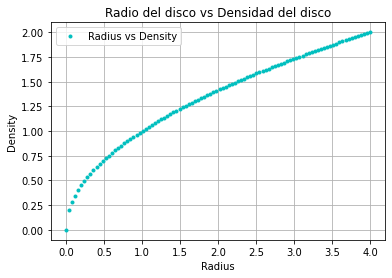

In [6]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel("Radius")
ax.set_ylabel("Density")
ax.set_title("Radio del disco vs Densidad del disco") 
ax.plot(radius, density, '.', color='c', label="Radius vs Density")
ax.legend()
ax.grid()

b) sabiendo que la masa del disco viene dada por una integral: 

$m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr$

calcular la masa del disco mediante integración numérica

In [7]:
import scipy.integrate

In [8]:
I_trapz = scipy.integrate.trapz(2*np.pi*radius*density,radius)
I_trapz

80.42728369193307

##Ejercicio 2:

$C_v \approx \left (\frac{dP}{dT} \right)$

In [9]:
!wget https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_pressure_vs_temparature.csv

--2022-09-05 09:33:18--  https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_II_a/data_pressure_vs_temparature.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1412 (1.4K) [text/plain]
Saving to: 'data_pressure_vs_temparature.csv'

data_pressure_vs_te 100%[===================>]   1.38K  --.-KB/s    in 0s      

2022-09-05 09:33:18 (9.79 MB/s) - 'data_pressure_vs_temparature.csv' saved [1412/1412]



In [10]:
datos = pd.read_csv("data_pressure_vs_temparature.csv", sep=',')

In [11]:
datos.head()

,Temperature,Pressure
0,4.789201e-08,1.958251e-17
1,6.625061e-08,2.055515e-17
2,8.460922e-08,2.237848e-17
3,1.029678e-07,2.534132e-17
4,1.213264e-07,2.994527e-17


In [12]:
Temperature = datos['Temperature'].to_numpy()
Pressure = datos['Pressure']

b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)

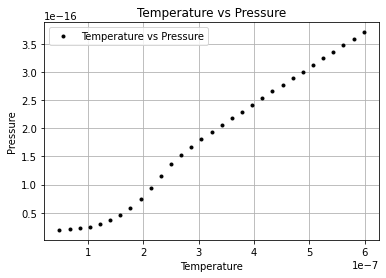

In [13]:
fig,ax=plt.subplots(1,1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Pressure")
ax.set_title("Temperature vs Pressure")
ax.plot(Temperature, Pressure, '.', color='black', label="Temperature vs Pressure")
ax.legend()
ax.grid()

c) utilizando la derivada numérica, encuentre la capacidad calorífica.

In [14]:
from scipy import stats

In [15]:
C_v=np.gradient(Pressure,Temperature)

c) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)

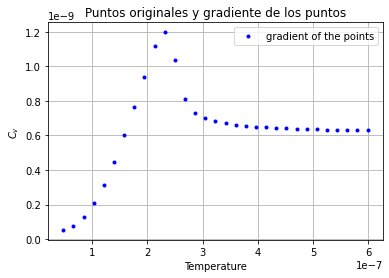

In [16]:
fig,ax=plt.subplots(1,1)
ax.plot(Temperature,C_v,'.b',label='gradient of the points')
ax.set_xlabel('Temperature')
ax.set_ylabel('$C_v$')
ax.set_title("Puntos originales y gradiente de los puntos")
ax.grid()
ax.legend()

d) usando el ultimos datos hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)

In [17]:
np.max(C_v)

1.1976979318858827e-09

In [18]:
np.argmax(C_v)

10

In [19]:
np.where(C_v == max(C_v))[0][0]

10

##Ejercicio 3:


Usando metodo Monte Carlo resuleve el siguiente integral:

$\int_{0}^{\pi/2} \int_{0}^{1} e^y \ cos(x) \ dy \ dx$

In [20]:
a=0.0
b=np.pi*0.5

c=0.0
d=1

N=100000
E=0
for i in range(N):
  x=np.random.uniform(a,b)
  y=np.random.uniform(c,d)
  E = E + np.exp(y) * np.cos(x)

E = E/N
I=E*(b-a)/(d-c)
print(I)


1.7167237356305192


#Ejercicio 4:
Resuelve siguiente integral (muestra el error de solucion):

$\int_{0}^{10}\frac{x^3}{x^4+16} dx$

In [21]:
from scipy.integrate import quad

In [22]:
def some_func(x):
  return x**3/(x**4+16)

In [23]:
def my_simps(some_func,a,b,n):
  h = (b - a)/ float(n)
  S = 0.0
  for i in range(1, int(n)):
      x = a + i * h
      if (i%2==0):
          S = S + 2 * some_func(x)
      else:
          S = S + 4 * some_func(x)
  S = S + some_func(a) + some_func(b) 
  result = S * h/3
  return result

In [24]:
my_simps(some_func,0,10,1000)

1.60983759275416

In [25]:
quad(some_func,0,10)

(1.6098375927750248, 1.405084939945598e-09)

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 2.
Solution + presentation of the results	            (max 2.5p):	1.5p
* falta temperatura critica

Exercise 3.
Solution + presentation of the results	            (max 2.5p):	2.5p

Exercise 4 
Solution + presentation of the results	            (max 2.5p):	2.5p




- Total:                                              (max 10.0p):   9.0p
```